In [1]:
import torch
from model.transformer import TransformerTimeSeriesModel

import pandas as pd



In [2]:
# Step 2: Initialize and load Transformer model
import os
import mlflow

os.environ["MLFLOW_TRACKING_URI"] = "http://localhost:5001"

model_name = "pytorch-transformer-time-series-model"
version = 8

model_uri = f"models:/{model_name}/{version}"
print(f"ℹ️ Loading model from URI: {model_uri}")
model = mlflow.pyfunc.load_model(model_uri)

print("Model loaded successfully")

/Users/jinyonglee/miniforge3/envs/stock_ml/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ℹ️ Loading model from URI: models:/pytorch-transformer-time-series-model/8


Model loaded successfully


In [3]:
# Step 3: Perform predictions on historical data
from data_processing.prepare_data import prepare_backtest_input

price_data, feature_data, date_data = prepare_backtest_input("../data/processed/merged_data.csv")

선택된 데이터 기간: 2015-05-22 00:00:00 ~ 2016-10-31 00:00:00


In [4]:
# Step 5: Run backtest
from backtest.agent import BacktestAgent

initial_balance = price_data[0]

# 백테스트 실행
n_steps = 30  # 시퀀스 길이
agent = BacktestAgent(
    model=model,
    price_data=price_data,
    feature_data=feature_data,
    date_data=date_data,
    n_steps=n_steps,
    initial_balance=initial_balance,
    transaction_cost=0.001,
    signal_threshold=0.03,
    risk_tolerance=0.3,
)

agent.run()

Backtest completed.


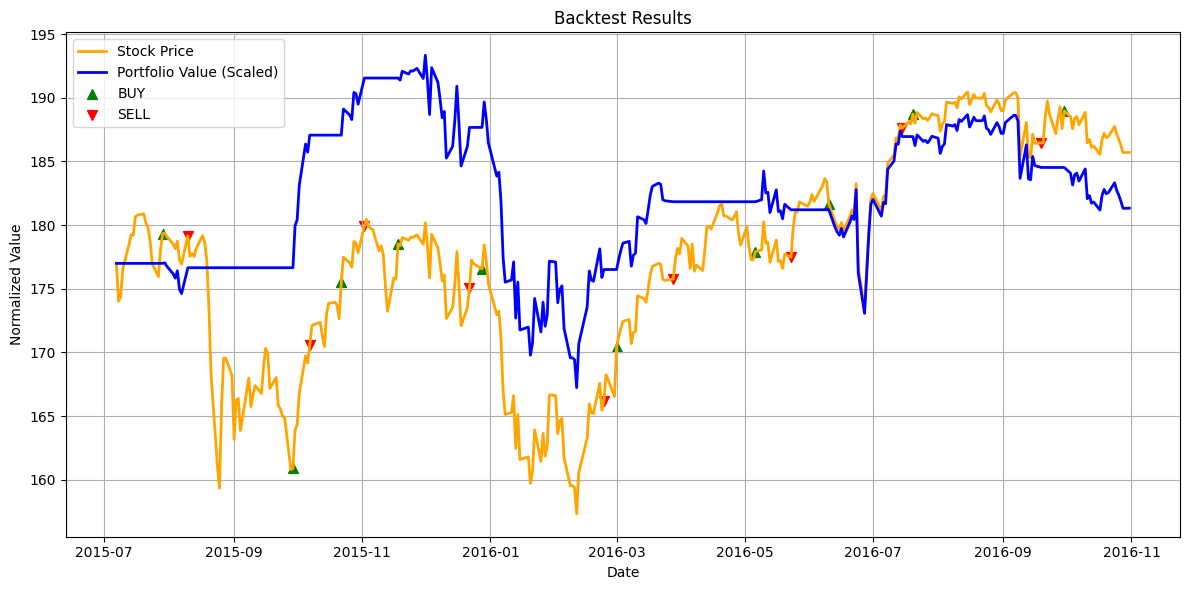

In [5]:
agent.show_plot()